IMPORT LIBRARIES

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import f1_score


LOAD DATASET

In [3]:
data = pd.read_csv('/content/drive/MyDrive/xai/Tor Non Tor-Binary class/SelectedFeatures-10s-TOR-NonTOR.csv')


In [4]:
import pandas as pd

# Assuming your DataFrame is named df
nan_rows = data[data.isnull().any(axis=1)]

# To get the count of rows with NaN values
count_nan_rows = nan_rows.shape[0]

print(f"Number of rows with NaN values: {count_nan_rows}")


Number of rows with NaN values: 2


DATA PREPARATION AND PREPROCESSING

In [5]:
data.shape

(67834, 29)

In [6]:
data['label'].value_counts()

label
nonTOR    59790
TOR        8044
Name: count, dtype: int64

In [7]:
#checking for NA's
data.isna().sum()

Source IP            0
 Source Port         0
 Destination IP      0
 Destination Port    0
 Protocol            0
 Flow Duration       0
 Flow Bytes/s        2
 Flow Packets/s      0
 Flow IAT Mean       0
 Flow IAT Std        0
 Flow IAT Max        0
 Flow IAT Min        0
Fwd IAT Mean         0
 Fwd IAT Std         0
 Fwd IAT Max         0
 Fwd IAT Min         0
Bwd IAT Mean         0
 Bwd IAT Std         0
 Bwd IAT Max         0
 Bwd IAT Min         0
Active Mean          0
 Active Std          0
 Active Max          0
 Active Min          0
Idle Mean            0
 Idle Std            0
 Idle Max            0
 Idle Min            0
label                0
dtype: int64

In [8]:
data['label'].unique()

array(['nonTOR', 'TOR'], dtype=object)

In [9]:
#dropping source IP and destination IP columns
data = data.drop(['Source IP'],axis=1)

In [10]:
data.shape

(67834, 28)

In [11]:
data = data.drop([' Destination IP'],axis=1)


In [12]:
# Replace infinity values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN values with class-wise means
class_column = 'label'

# Calculate class-wise means
class_means = data.groupby(class_column).transform(lambda x: x.fillna(x.mean()))

# Fill NaN values with class-wise means
data = data.fillna(class_means)

In [13]:
#label encoding categorical variable
encoder = LabelEncoder()
data.label = encoder.fit_transform(data.label)
data.label

0        1
1        1
2        1
3        1
4        1
        ..
67829    1
67830    1
67831    1
67832    1
67833    1
Name: label, Length: 67834, dtype: int64

### With 4 Features

In [14]:
# Assuming 'data' is your dataframe
columns_to_keep = [' Source Port', ' Flow Bytes/s', ' Destination Port', ' Protocol', 'label']

# Filter 'data' dataframe to keep only the specified columns
data_4 = data[columns_to_keep]

In [15]:
#split the dataset into independent and dependent variables
X = data_4.iloc[:,:-1]
y = data_4.iloc[:,-1]

In [16]:
#splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25,random_state=10)

In [17]:
type(X_train)

pandas.core.frame.DataFrame

In [18]:
from lightgbm import LGBMClassifier

In [19]:
lgb = LGBMClassifier(random_state=10)
lgb.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 44826, number of negative: 6049
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002362 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 755
[LightGBM] [Info] Number of data points in the train set: 50875, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.881101 -> initscore=2.002895
[LightGBM] [Info] Start training from score 2.002895


LGBMClassifier(random_state=10)

In [20]:
y_pred=lgb.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [21]:
predict_lgb = lambda x: lgb.predict_proba(x).astype(float)

In [22]:
#MAKING THE CONFUSION MATRIX

lgb_rpt = classification_report(y_test,y_pred)
print("classification report: \n", lgb_rpt)
print("Accuracy Score :" ,accuracy_score(y_test,y_pred))

classification report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1995
           1       1.00      1.00      1.00     14964

    accuracy                           1.00     16959
   macro avg       0.99      0.99      0.99     16959
weighted avg       1.00      1.00      1.00     16959

Accuracy Score : 0.9964030898048234


In [23]:
# Replace 'y_true' and 'y_pred' with your actual and predicted labels
f1_weighted = f1_score(y_test,y_pred, average='weighted')
f1_weighted

0.9964042607145065

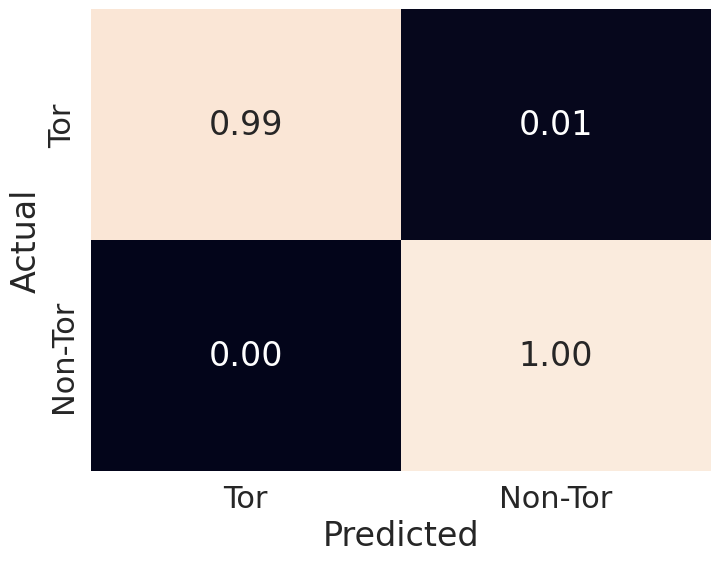

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
# Replace class_labels with the actual class labels in your problem
class_labels = ['Tor', 'Non-Tor']
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix to represent probabilities
cm_normalized = cm / cm.sum(axis=1)[:, np.newaxis]

# Create a DataFrame from the normalized confusion matrix
cm_df = pd.DataFrame(cm_normalized, index=class_labels, columns=class_labels)
# Increase font size
sns.set(font_scale=2)
# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='.2f',cbar=False)

# Customize labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.show()


### With 8 Features

In [25]:
# Assuming 'data' is your dataframe
columns_to_keep = [' Fwd IAT Min', ' Bwd IAT Max', ' Flow Duration', ' Flow IAT Min', ' Source Port', ' Flow Bytes/s', ' Destination Port', ' Protocol', 'label']

# Filter 'data' dataframe to keep only the specified columns
data_8 = data[columns_to_keep]

In [26]:
#split the dataset into independent and dependent variables
X = data_8.iloc[:,:-1]
y = data_8.iloc[:,-1]

In [27]:
#splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25,random_state=10)

In [28]:
type(X_train)

pandas.core.frame.DataFrame

In [29]:
from lightgbm import LGBMClassifier

In [30]:
lgb = LGBMClassifier(random_state=10)
lgb.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 44826, number of negative: 6049
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007537 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1775
[LightGBM] [Info] Number of data points in the train set: 50875, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.881101 -> initscore=2.002895
[LightGBM] [Info] Start training from score 2.002895


LGBMClassifier(random_state=10)

In [31]:
y_pred=lgb.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [32]:
predict_lgb = lambda x: lgb.predict_proba(x).astype(float)

In [33]:
#MAKING THE CONFUSION MATRIX

lgb_rpt = classification_report(y_test,y_pred)
print("classification report: \n", lgb_rpt)
print("Accuracy Score :" ,accuracy_score(y_test,y_pred))

classification report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1995
           1       1.00      1.00      1.00     14964

    accuracy                           1.00     16959
   macro avg       1.00      1.00      1.00     16959
weighted avg       1.00      1.00      1.00     16959

Accuracy Score : 0.998231027772864


In [34]:
# Replace 'y_true' and 'y_pred' with your actual and predicted labels
f1_weighted = f1_score(y_test,y_pred, average='weighted')
f1_weighted

0.9982306433027354

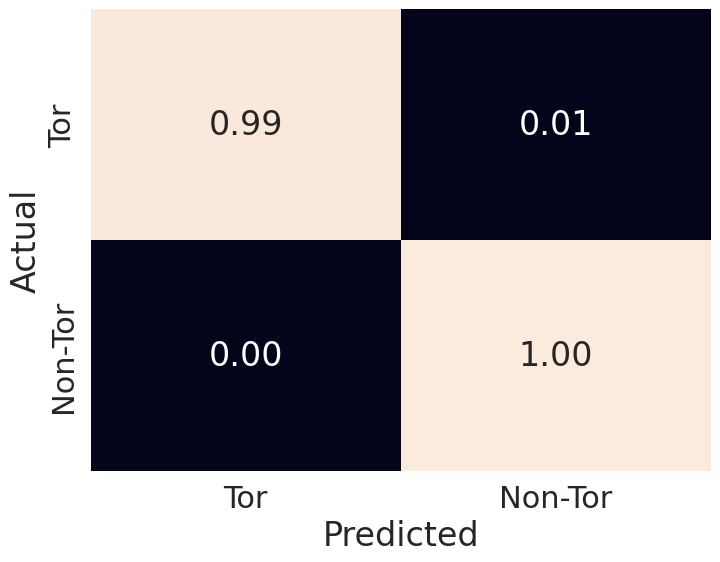

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
# Replace class_labels with the actual class labels in your problem
class_labels = ['Tor', 'Non-Tor']
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix to represent probabilities
cm_normalized = cm / cm.sum(axis=1)[:, np.newaxis]

# Create a DataFrame from the normalized confusion matrix
cm_df = pd.DataFrame(cm_normalized, index=class_labels, columns=class_labels)
# Increase font size
sns.set(font_scale=2)
# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='.2f',cbar=False)

# Customize labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.show()


### With 12 Features

In [36]:
# Assuming 'data' is your dataframe
columns_to_keep = ['Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Min', ' Fwd IAT Max', ' Fwd IAT Min', ' Bwd IAT Max', ' Flow Duration', ' Flow IAT Min', ' Source Port', ' Flow Bytes/s', ' Destination Port', ' Protocol', 'label']

# Filter 'data' dataframe to keep only the specified columns
data_12 = data[columns_to_keep]

In [37]:
#split the dataset into independent and dependent variables
X = data_12.iloc[:,:-1]
y = data_12.iloc[:,-1]

In [38]:
#splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25,random_state=10)

In [39]:
type(X_train)

pandas.core.frame.DataFrame

In [40]:
from lightgbm import LGBMClassifier

In [41]:
lgb = LGBMClassifier(random_state=10)
lgb.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 44826, number of negative: 6049
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015686 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2795
[LightGBM] [Info] Number of data points in the train set: 50875, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.881101 -> initscore=2.002895
[LightGBM] [Info] Start training from score 2.002895


LGBMClassifier(random_state=10)

In [42]:
y_pred=lgb.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [43]:
predict_lgb = lambda x: lgb.predict_proba(x).astype(float)

In [44]:
#MAKING THE CONFUSION MATRIX

lgb_rpt = classification_report(y_test,y_pred)
print("classification report: \n", lgb_rpt)
print("Accuracy Score :" ,accuracy_score(y_test,y_pred))

classification report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1995
           1       1.00      1.00      1.00     14964

    accuracy                           1.00     16959
   macro avg       1.00      1.00      1.00     16959
weighted avg       1.00      1.00      1.00     16959

Accuracy Score : 0.9985848222182911


In [45]:
# Replace 'y_true' and 'y_pred' with your actual and predicted labels
f1_weighted = f1_score(y_test,y_pred, average='weighted')
f1_weighted

0.998584514642188

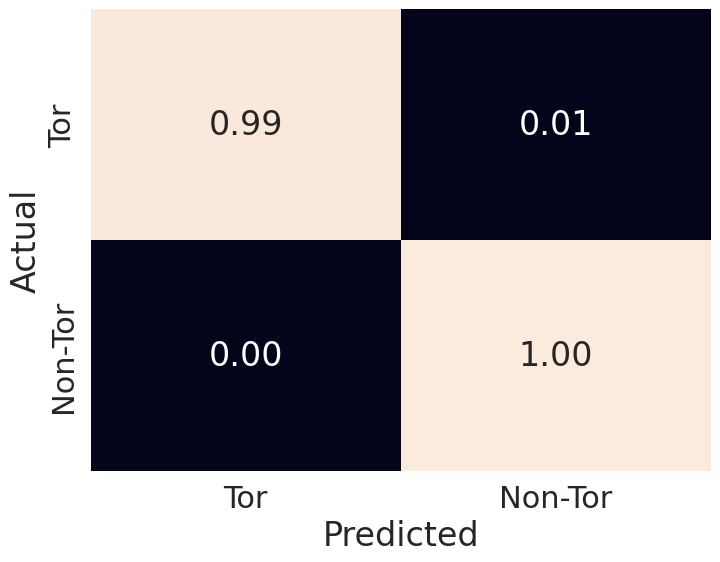

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
# Replace class_labels with the actual class labels in your problem
class_labels = ['Tor', 'Non-Tor']
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix to represent probabilities
cm_normalized = cm / cm.sum(axis=1)[:, np.newaxis]

# Create a DataFrame from the normalized confusion matrix
cm_df = pd.DataFrame(cm_normalized, index=class_labels, columns=class_labels)
# Increase font size
sns.set(font_scale=2)
# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='.2f',cbar=False)

# Customize labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.show()


### With 16 Features

In [47]:
# Assuming 'data' is your dataframe
columns_to_keep = [' Flow IAT Std', ' Fwd IAT Std', 'Fwd IAT Mean', ' Flow IAT Max', 'Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Min', ' Fwd IAT Max', ' Fwd IAT Min', ' Bwd IAT Max', ' Flow Duration', ' Flow IAT Min', ' Source Port', ' Flow Bytes/s', ' Destination Port', ' Protocol', 'label']

# Filter 'data' dataframe to keep only the specified columns
data_16 = data[columns_to_keep]

In [48]:
#split the dataset into independent and dependent variables
X = data_16.iloc[:,:-1]
y = data_16.iloc[:,-1]

In [49]:
#splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25,random_state=10)

In [50]:
type(X_train)

pandas.core.frame.DataFrame

In [51]:
from lightgbm import LGBMClassifier

In [52]:
lgb = LGBMClassifier(random_state=10)
lgb.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 44826, number of negative: 6049
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017612 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3815
[LightGBM] [Info] Number of data points in the train set: 50875, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.881101 -> initscore=2.002895
[LightGBM] [Info] Start training from score 2.002895


LGBMClassifier(random_state=10)

In [53]:
y_pred=lgb.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [54]:
predict_lgb = lambda x: lgb.predict_proba(x).astype(float)

In [55]:
#MAKING THE CONFUSION MATRIX

lgb_rpt = classification_report(y_test,y_pred)
print("classification report: \n", lgb_rpt)
print("Accuracy Score :" ,accuracy_score(y_test,y_pred))

classification report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1995
           1       1.00      1.00      1.00     14964

    accuracy                           1.00     16959
   macro avg       1.00      1.00      1.00     16959
weighted avg       1.00      1.00      1.00     16959

Accuracy Score : 0.998231027772864


In [56]:
# Replace 'y_true' and 'y_pred' with your actual and predicted labels
f1_weighted = f1_score(y_test,y_pred, average='weighted')
f1_weighted

0.998231027772864

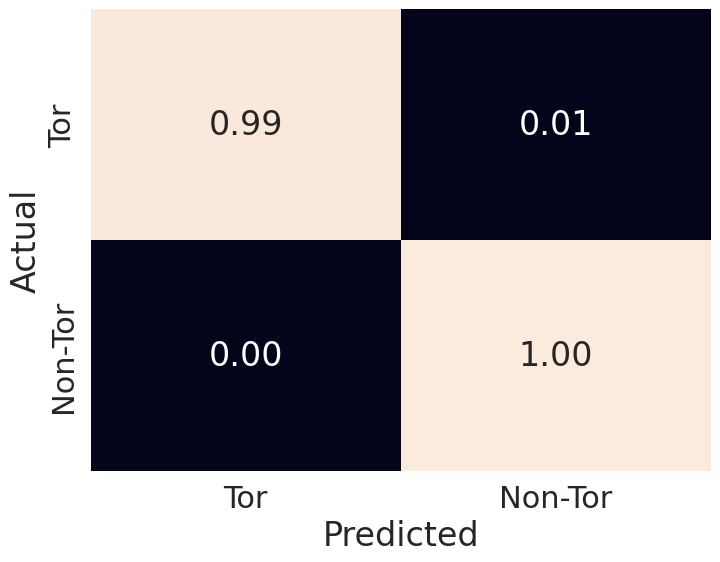

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
# Replace class_labels with the actual class labels in your problem
class_labels = ['Tor', 'Non-Tor']
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix to represent probabilities
cm_normalized = cm / cm.sum(axis=1)[:, np.newaxis]

# Create a DataFrame from the normalized confusion matrix
cm_df = pd.DataFrame(cm_normalized, index=class_labels, columns=class_labels)
# Increase font size
sns.set(font_scale=2)
# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='.2f',cbar=False)

# Customize labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.show()


### With 20 Features

In [58]:
# Assuming 'data' is your dataframe
columns_to_keep = ['Idle Mean', 'Active Mean', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Fwd IAT Std', 'Fwd IAT Mean', ' Flow IAT Max', 'Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Min', ' Fwd IAT Max', ' Fwd IAT Min', ' Bwd IAT Max', ' Flow Duration', ' Flow IAT Min', ' Source Port', ' Flow Bytes/s', ' Destination Port', ' Protocol', 'label']

# Filter 'data' dataframe to keep only the specified columns
data_20 = data[columns_to_keep]

In [59]:
#split the dataset into independent and dependent variables
X = data_20.iloc[:,:-1]
y = data_20.iloc[:,-1]

In [60]:
#splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25,random_state=10)

In [61]:
type(X_train)

pandas.core.frame.DataFrame

In [62]:
from lightgbm import LGBMClassifier

In [63]:
lgb = LGBMClassifier(random_state=10)
lgb.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 44826, number of negative: 6049
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4835
[LightGBM] [Info] Number of data points in the train set: 50875, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.881101 -> initscore=2.002895
[LightGBM] [Info] Start training from score 2.002895


LGBMClassifier(random_state=10)

In [64]:
y_pred=lgb.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [65]:
predict_lgb = lambda x: lgb.predict_proba(x).astype(float)

In [66]:
#MAKING THE CONFUSION MATRIX

lgb_rpt = classification_report(y_test,y_pred)
print("classification report: \n", lgb_rpt)
print("Accuracy Score :" ,accuracy_score(y_test,y_pred))

classification report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1995
           1       1.00      1.00      1.00     14964

    accuracy                           1.00     16959
   macro avg       1.00      1.00      1.00     16959
weighted avg       1.00      1.00      1.00     16959

Accuracy Score : 0.9984668907364821


In [67]:
# Replace 'y_true' and 'y_pred' with your actual and predicted labels
f1_weighted = f1_score(y_test,y_pred, average='weighted')
f1_weighted

0.9984662239289661

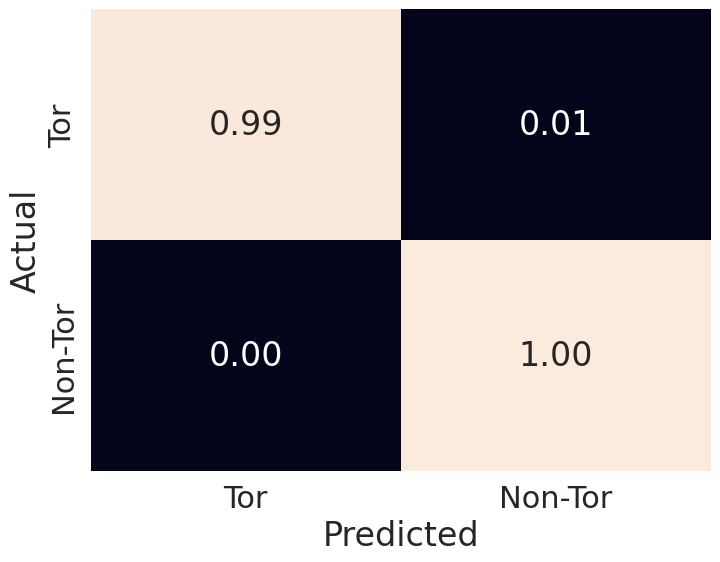

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
# Replace class_labels with the actual class labels in your problem
class_labels = ['Tor', 'Non-Tor']
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix to represent probabilities
cm_normalized = cm / cm.sum(axis=1)[:, np.newaxis]

# Create a DataFrame from the normalized confusion matrix
cm_df = pd.DataFrame(cm_normalized, index=class_labels, columns=class_labels)
# Increase font size
sns.set(font_scale=2)
# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='.2f',cbar=False)

# Customize labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.show()


### With 24 Features

In [69]:
# Assuming 'data' is your dataframe
columns_to_keep = [' Active Min', ' Active Max', ' Active Std', ' Idle Max', 'Idle Mean', 'Active Mean', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Fwd IAT Std', 'Fwd IAT Mean', ' Flow IAT Max', 'Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Min', ' Fwd IAT Max', ' Fwd IAT Min', ' Bwd IAT Max', ' Flow Duration', ' Flow IAT Min', ' Source Port', ' Flow Bytes/s', ' Destination Port', ' Protocol', 'label']

# Filter 'data' dataframe to keep only the specified columns
data_24 = data[columns_to_keep]

In [70]:
#split the dataset into independent and dependent variables
X = data_24.iloc[:,:-1]
y = data_24.iloc[:,-1]

In [71]:
#splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25,random_state=10)

In [72]:
type(X_train)

pandas.core.frame.DataFrame

In [73]:
from lightgbm import LGBMClassifier

In [74]:
lgb = LGBMClassifier(random_state=10)
lgb.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 44826, number of negative: 6049
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014906 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5600
[LightGBM] [Info] Number of data points in the train set: 50875, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.881101 -> initscore=2.002895
[LightGBM] [Info] Start training from score 2.002895


LGBMClassifier(random_state=10)

In [75]:
y_pred=lgb.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [76]:
predict_lgb = lambda x: lgb.predict_proba(x).astype(float)

In [77]:
#MAKING THE CONFUSION MATRIX

lgb_rpt = classification_report(y_test,y_pred)
print("classification report: \n", lgb_rpt)
print("Accuracy Score :" ,accuracy_score(y_test,y_pred))

classification report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1995
           1       1.00      1.00      1.00     14964

    accuracy                           1.00     16959
   macro avg       1.00      1.00      1.00     16959
weighted avg       1.00      1.00      1.00     16959

Accuracy Score : 0.9984668907364821


In [78]:
# Replace 'y_true' and 'y_pred' with your actual and predicted labels
f1_weighted = f1_score(y_test,y_pred, average='weighted')
f1_weighted

0.9984662239289661

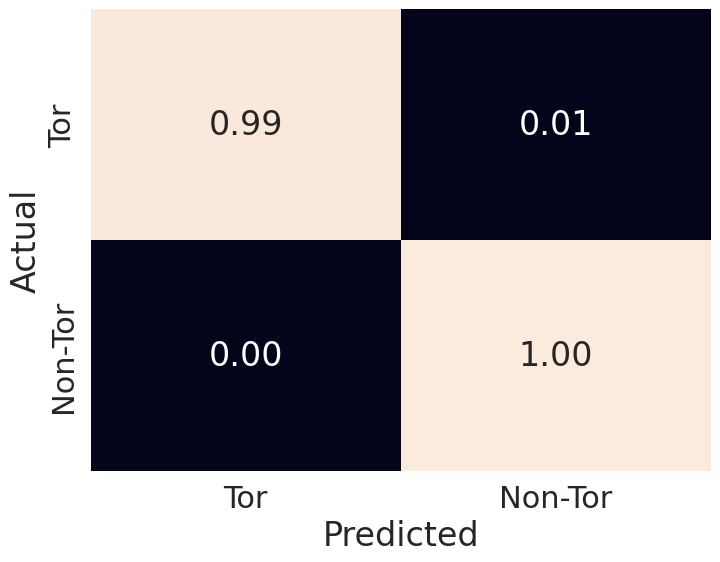

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
# Replace class_labels with the actual class labels in your problem
class_labels = ['Tor', 'Non-Tor']
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix to represent probabilities
cm_normalized = cm / cm.sum(axis=1)[:, np.newaxis]

# Create a DataFrame from the normalized confusion matrix
cm_df = pd.DataFrame(cm_normalized, index=class_labels, columns=class_labels)
# Increase font size
sns.set(font_scale=2)
# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='.2f',cbar=False)

# Customize labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.show()


### With Full Features

In [80]:
# Assuming 'data' is your dataframe
columns_to_keep = [' Idle Min', ' Idle Std', ' Active Min', ' Active Max', ' Active Std', ' Idle Max', 'Idle Mean', 'Active Mean', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Fwd IAT Std', 'Fwd IAT Mean', ' Flow IAT Max', 'Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Min', ' Fwd IAT Max', ' Fwd IAT Min', ' Bwd IAT Max', ' Flow Duration', ' Flow IAT Min', ' Source Port', ' Flow Bytes/s', ' Destination Port', ' Protocol', 'label']

# Filter 'data' dataframe to keep only the specified columns
data_28 = data[columns_to_keep]

In [81]:
#split the dataset into independent and dependent variables
X = data_28.iloc[:,:-1]
y = data_28.iloc[:,-1]

In [82]:
#splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25,random_state=10)

In [83]:
type(X_train)

pandas.core.frame.DataFrame

In [84]:
from lightgbm import LGBMClassifier

In [85]:
lgb = LGBMClassifier(random_state=10)
lgb.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 44826, number of negative: 6049
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5855
[LightGBM] [Info] Number of data points in the train set: 50875, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.881101 -> initscore=2.002895
[LightGBM] [Info] Start training from score 2.002895


LGBMClassifier(random_state=10)

In [86]:
y_pred=lgb.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [87]:
predict_lgb = lambda x: lgb.predict_proba(x).astype(float)

In [88]:
#MAKING THE CONFUSION MATRIX

lgb_rpt = classification_report(y_test,y_pred)
print("classification report: \n", lgb_rpt)
print("Accuracy Score :" ,accuracy_score(y_test,y_pred))

classification report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1995
           1       1.00      1.00      1.00     14964

    accuracy                           1.00     16959
   macro avg       1.00      1.00      1.00     16959
weighted avg       1.00      1.00      1.00     16959

Accuracy Score : 0.9984668907364821


In [89]:
# Replace 'y_true' and 'y_pred' with your actual and predicted labels
f1_weighted = f1_score(y_test,y_pred, average='weighted')
f1_weighted

0.9984662239289661

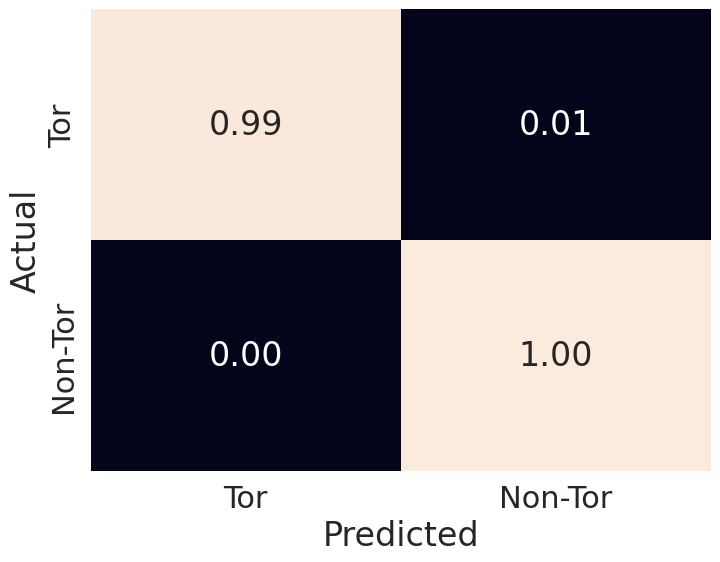

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
# Replace class_labels with the actual class labels in your problem
class_labels = ['Tor', 'Non-Tor']
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix to represent probabilities
cm_normalized = cm / cm.sum(axis=1)[:, np.newaxis]

# Create a DataFrame from the normalized confusion matrix
cm_df = pd.DataFrame(cm_normalized, index=class_labels, columns=class_labels)
# Increase font size
sns.set(font_scale=2)
# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='.2f',cbar=False)

# Customize labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.show()


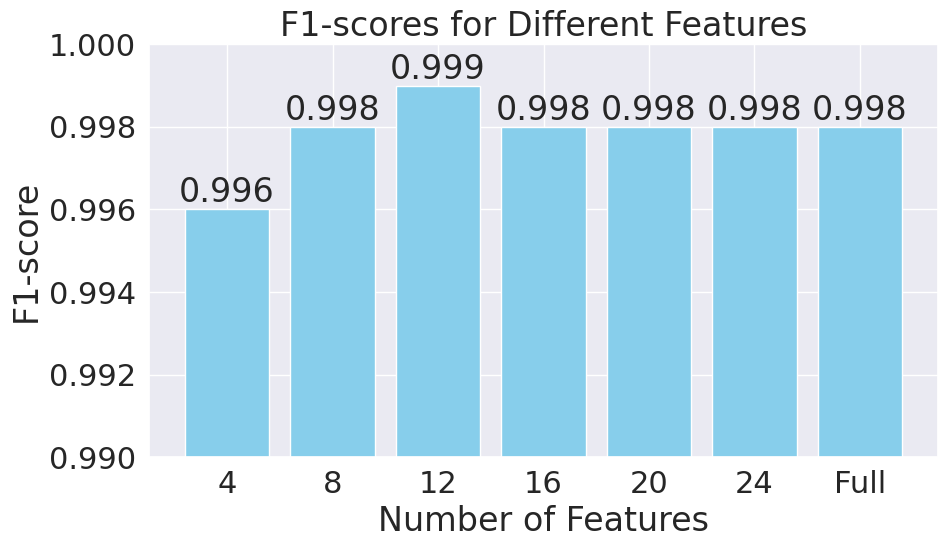

In [91]:
import matplotlib.pyplot as plt

# Data
features = ['4', '8', '12', '16', '20', '24', 'Full']
f1_scores = [0.996, 0.998, 0.999, 0.998, 0.998, 0.998, 0.998]

# Create the bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for F1-scores
bars1 = ax1.bar(features, f1_scores, color='skyblue')
ax1.set_title('F1-scores for Different Features')
ax1.set_xlabel('Number of Features')
ax1.set_ylabel('F1-score')
ax1.set_ylim([0.990, 1.000])

# Add data labels for F1-scores
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.3f}', ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()
